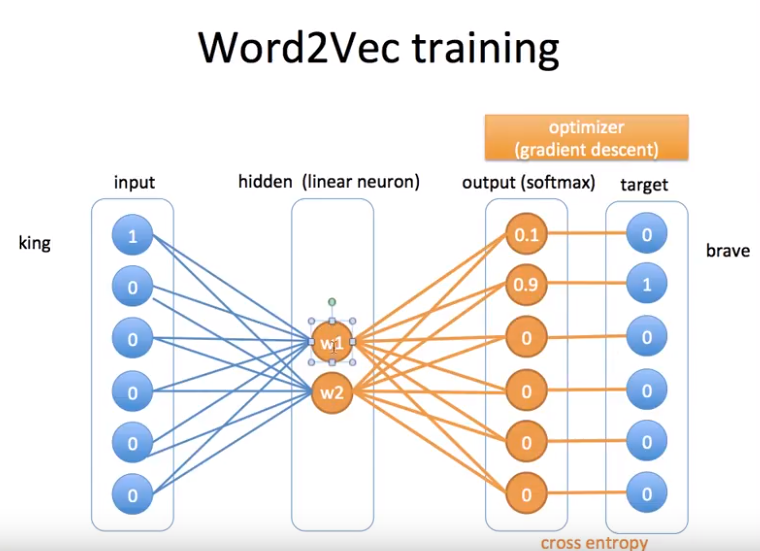

In [1]:
corpus = ['king is a strong man',
          'queen is a wise woman',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [4]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
        
    return results

In [6]:
corpus = remove_stop_words(corpus)
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [7]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
        
words = set(words)
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [14]:
"오늘은 금요일 덥구나".split()

['오늘은', '금요일', '덥구나']

In [9]:
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1]:
            if neighbor != word:
                data.append([word, neighbor])

In [16]:
import pandas as pd
for text in corpus:
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [18]:
df = pd.DataFrame(data, columns = ['input', 'label'])
df

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [19]:
df.shape

(52, 2)

In [20]:
word2int

{'king': 0,
 'woman': 1,
 'queen': 2,
 'princess': 3,
 'prince': 4,
 'girl': 5,
 'man': 6,
 'young': 7,
 'boy': 8,
 'strong': 9,
 'pretty': 10,
 'wise': 11}

In [21]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)
ONE_HOT_DIM

12

In [22]:
X = []  # input word
Y = []  # target word

In [23]:
def to_one_hot_encoding(data):
    one_hot_encoding = np.eye(ONE_HOT_DIM)[data]
    return one_hot_encoding

In [24]:
for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[x]))
    Y.append(to_one_hot_encoding(word2int[y]))

In [25]:
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [26]:
X_train.shape

(52, 12)

In [27]:
X_train

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [29]:
Y_train.shape

(52, 12)

In [30]:
Y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [31]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential, Model

In [32]:
EMBEDDING_DIM = 2

In [34]:
model = Sequential()
model.add(layers.Dense(units=EMBEDDING_DIM, input_dim=ONE_HOT_DIM))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 26        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.add(layers.Dense(units=ONE_HOT_DIM, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 26        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 26        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                36        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [37]:
len(X_train)

52

In [39]:
model.fit(X_train, Y_train, batch_size=len(X_train), epochs=20000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20000
52/52 [==============================] - 0s 4ms/sample - loss: 2.5020
Epoch 2/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.5009
Epoch 3/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4998
Epoch 4/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4988
Epoch 5/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4977
Epoch 6/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4966
Epoch 7/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4956
Epoch 8/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4945
Epoch 9/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4935
Epoch 10/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4924
Epoch 11/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4914
Epoch 12/20000
5

Epoch 94/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4128
Epoch 95/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4119
Epoch 96/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4110
Epoch 97/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4101
Epoch 98/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4092
Epoch 99/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4083
Epoch 100/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4074
Epoch 101/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.4065
Epoch 102/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4056
Epoch 103/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4047
Epoch 104/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.4039
Epoch 105/20000
52/52 [==========================

Epoch 189/20000
52/52 [==============================] - 0s 39us/sample - loss: 2.3252
Epoch 190/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.3242
Epoch 191/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.3232
Epoch 192/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.3223
Epoch 193/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.3213
Epoch 194/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.3203
Epoch 195/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.3194
Epoch 196/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.3184
Epoch 197/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.3174
Epoch 198/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.3164
Epoch 199/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.3155
Epoch 200/20000
52/52 [====================

Epoch 284/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2321
Epoch 285/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2311
Epoch 286/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.2302
Epoch 287/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2292
Epoch 288/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2282
Epoch 289/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2273
Epoch 290/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2263
Epoch 291/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.2253
Epoch 292/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2244
Epoch 293/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2234
Epoch 294/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.2224
Epoch 295/20000
52/52 [====================

Epoch 379/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.1442
Epoch 380/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.1434
Epoch 381/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1425
Epoch 382/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1417
Epoch 383/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1408
Epoch 384/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1399
Epoch 385/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.1391
Epoch 386/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1382
Epoch 387/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.1374
Epoch 388/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1365
Epoch 389/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.1357
Epoch 390/20000
52/52 [====================

Epoch 474/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0694
Epoch 475/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0686
Epoch 476/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0679
Epoch 477/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0672
Epoch 478/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0665
Epoch 479/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0658
Epoch 480/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0651
Epoch 481/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0644
Epoch 482/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0637
Epoch 483/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0630
Epoch 484/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0623
Epoch 485/20000
52/52 [====================

Epoch 569/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0091
Epoch 570/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0086
Epoch 571/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0080
Epoch 572/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0074
Epoch 573/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0069
Epoch 574/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0063
Epoch 575/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0058
Epoch 576/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0052
Epoch 577/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0047
Epoch 578/20000
52/52 [==============================] - 0s 38us/sample - loss: 2.0041
Epoch 579/20000
52/52 [==============================] - 0s 19us/sample - loss: 2.0036
Epoch 580/20000
52/52 [====================

Epoch 664/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9619
Epoch 665/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9615
Epoch 666/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9610
Epoch 667/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9606
Epoch 668/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9601
Epoch 669/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9597
Epoch 670/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9593
Epoch 671/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9589
Epoch 672/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.9584
Epoch 673/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9580
Epoch 674/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9576
Epoch 675/20000
52/52 [====================

Epoch 759/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9250
Epoch 760/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9247
Epoch 761/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.9243
Epoch 762/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9240
Epoch 763/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9237
Epoch 764/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9233
Epoch 765/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9230
Epoch 766/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9227
Epoch 767/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9223
Epoch 768/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.9220
Epoch 769/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.9216
Epoch 770/20000
52/52 [====================

Epoch 854/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8960
Epoch 855/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8958
Epoch 856/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8955
Epoch 857/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8952
Epoch 858/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8950
Epoch 859/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8947
Epoch 860/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8944
Epoch 861/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8942
Epoch 862/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8939
Epoch 863/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8936
Epoch 864/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8934
Epoch 865/20000
52/52 [====================

Epoch 949/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8727
Epoch 950/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8725
Epoch 951/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8723
Epoch 952/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8720
Epoch 953/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8718
Epoch 954/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8716
Epoch 955/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8714
Epoch 956/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8712
Epoch 957/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8709
Epoch 958/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8707
Epoch 959/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8705
Epoch 960/20000
52/52 [====================

Epoch 1043/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8534
Epoch 1044/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8532
Epoch 1045/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8530
Epoch 1046/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8528
Epoch 1047/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8526
Epoch 1048/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8524
Epoch 1049/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8523
Epoch 1050/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8521
Epoch 1051/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8519
Epoch 1052/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8517
Epoch 1053/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8515
Epoch 1054/20000
52/52 [========

Epoch 1137/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8365
Epoch 1138/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8363
Epoch 1139/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8361
Epoch 1140/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8359
Epoch 1141/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8358
Epoch 1142/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8356
Epoch 1143/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8354
Epoch 1144/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8353
Epoch 1145/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8351
Epoch 1146/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8349
Epoch 1147/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8347
Epoch 1148/20000
52/52 [========

Epoch 1231/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8208
Epoch 1232/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8206
Epoch 1233/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8205
Epoch 1234/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8203
Epoch 1235/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8201
Epoch 1236/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8200
Epoch 1237/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8198
Epoch 1238/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8196
Epoch 1239/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8195
Epoch 1240/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8193
Epoch 1241/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8192
Epoch 1242/20000
52/52 [========

Epoch 1325/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8056
Epoch 1326/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8054
Epoch 1327/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8053
Epoch 1328/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8051
Epoch 1329/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.8049
Epoch 1330/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.8048
Epoch 1331/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8046
Epoch 1332/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8044
Epoch 1333/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8043
Epoch 1334/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8041
Epoch 1335/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.8040
Epoch 1336/20000
52/52 [========

52/52 [==============================] - 0s 19us/sample - loss: 1.7904
Epoch 1419/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7903
Epoch 1420/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7901
Epoch 1421/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7899
Epoch 1422/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7898
Epoch 1423/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7896
Epoch 1424/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7894
Epoch 1425/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7893
Epoch 1426/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7891
Epoch 1427/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7889
Epoch 1428/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7888
Epoch 1429/20000
52/52 [=========================

Epoch 1512/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7747
Epoch 1513/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7745
Epoch 1514/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.7743
Epoch 1515/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7742
Epoch 1516/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7740
Epoch 1517/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7738
Epoch 1518/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7737
Epoch 1519/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7735
Epoch 1520/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7733
Epoch 1521/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7732
Epoch 1522/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7730
Epoch 1523/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.7588
Epoch 1606/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7587
Epoch 1607/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.7585
Epoch 1608/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7583
Epoch 1609/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7582
Epoch 1610/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7580
Epoch 1611/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7578
Epoch 1612/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7576
Epoch 1613/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7575
Epoch 1614/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7573
Epoch 1615/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7571
Epoch 1616/20000
52/52 [=========================

Epoch 1699/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7431
Epoch 1700/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7430
Epoch 1701/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7428
Epoch 1702/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7426
Epoch 1703/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7425
Epoch 1704/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7423
Epoch 1705/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7421
Epoch 1706/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7420
Epoch 1707/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7418
Epoch 1708/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7417
Epoch 1709/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7415
Epoch 1710/20000
52/52 [========

Epoch 1793/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7285
Epoch 1794/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7283
Epoch 1795/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7282
Epoch 1796/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7281
Epoch 1797/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7279
Epoch 1798/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7278
Epoch 1799/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7276
Epoch 1800/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7275
Epoch 1801/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.7273
Epoch 1802/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7272
Epoch 1803/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7270
Epoch 1804/20000
52/52 [========

Epoch 1887/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7155
Epoch 1888/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7154
Epoch 1889/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.7153
Epoch 1890/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7152
Epoch 1891/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7150
Epoch 1892/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7149
Epoch 1893/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7148
Epoch 1894/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7147
Epoch 1895/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7145
Epoch 1896/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7144
Epoch 1897/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7143
Epoch 1898/20000
52/52 [========

Epoch 1981/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7043
Epoch 1982/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7042
Epoch 1983/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7041
Epoch 1984/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7040
Epoch 1985/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7039
Epoch 1986/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7038
Epoch 1987/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7037
Epoch 1988/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.7036
Epoch 1989/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7034
Epoch 1990/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.7033
Epoch 1991/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.7032
Epoch 1992/20000
52/52 [========

Epoch 2075/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6946
Epoch 2076/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6945
Epoch 2077/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6944
Epoch 2078/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6943
Epoch 2079/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.6942
Epoch 2080/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6941
Epoch 2081/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6940
Epoch 2082/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6939
Epoch 2083/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6938
Epoch 2084/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6937
Epoch 2085/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6937
Epoch 2086/20000
52/52 [========

Epoch 2169/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6861
Epoch 2170/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6860
Epoch 2171/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6859
Epoch 2172/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6858
Epoch 2173/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6858
Epoch 2174/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6857
Epoch 2175/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6856
Epoch 2176/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6855
Epoch 2177/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6854
Epoch 2178/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6853
Epoch 2179/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6853
Epoch 2180/20000
52/52 [========

Epoch 2263/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6786
Epoch 2264/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6785
Epoch 2265/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6784
Epoch 2266/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6784
Epoch 2267/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6783
Epoch 2268/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6782
Epoch 2269/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6781
Epoch 2270/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6781
Epoch 2271/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6780
Epoch 2272/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6779
Epoch 2273/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6778
Epoch 2274/20000
52/52 [========

Epoch 2357/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6719
Epoch 2358/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6718
Epoch 2359/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6718
Epoch 2360/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6717
Epoch 2361/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6716
Epoch 2362/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6716
Epoch 2363/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6715
Epoch 2364/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6714
Epoch 2365/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6714
Epoch 2366/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.6713
Epoch 2367/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6712
Epoch 2368/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.6660
Epoch 2451/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6659
Epoch 2452/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6659
Epoch 2453/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6658
Epoch 2454/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6658
Epoch 2455/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6657
Epoch 2456/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6656
Epoch 2457/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6656
Epoch 2458/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6655
Epoch 2459/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6655
Epoch 2460/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6654
Epoch 2461/20000
52/52 [=========================

Epoch 2544/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6607
Epoch 2545/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6606
Epoch 2546/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6606
Epoch 2547/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6605
Epoch 2548/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6605
Epoch 2549/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6604
Epoch 2550/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6604
Epoch 2551/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6603
Epoch 2552/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6603
Epoch 2553/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6602
Epoch 2554/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6602
Epoch 2555/20000
52/52 [========

Epoch 2638/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6559
Epoch 2639/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6559
Epoch 2640/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6558
Epoch 2641/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6558
Epoch 2642/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6557
Epoch 2643/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6557
Epoch 2644/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6556
Epoch 2645/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6556
Epoch 2646/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6555
Epoch 2647/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6555
Epoch 2648/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6554
Epoch 2649/20000
52/52 [========

52/52 [==============================] - 0s 19us/sample - loss: 1.6517
Epoch 2732/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6516
Epoch 2733/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6516
Epoch 2734/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6516
Epoch 2735/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6515
Epoch 2736/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6515
Epoch 2737/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6514
Epoch 2738/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6514
Epoch 2739/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6513
Epoch 2740/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6513
Epoch 2741/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6513
Epoch 2742/20000
52/52 [=========================

Epoch 2825/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6478
Epoch 2826/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6478
Epoch 2827/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6477
Epoch 2828/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6477
Epoch 2829/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6477
Epoch 2830/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6476
Epoch 2831/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6476
Epoch 2832/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6475
Epoch 2833/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6475
Epoch 2834/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6475
Epoch 2835/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6474
Epoch 2836/20000
52/52 [========

Epoch 2919/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6443
Epoch 2920/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6443
Epoch 2921/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6442
Epoch 2922/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6442
Epoch 2923/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6442
Epoch 2924/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6441
Epoch 2925/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6441
Epoch 2926/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6441
Epoch 2927/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6440
Epoch 2928/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6440
Epoch 2929/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6440
Epoch 2930/20000
52/52 [========

Epoch 3013/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6411
Epoch 3014/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6411
Epoch 3015/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6411
Epoch 3016/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6410
Epoch 3017/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6410
Epoch 3018/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6410
Epoch 3019/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6409
Epoch 3020/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6409
Epoch 3021/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6409
Epoch 3022/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6408
Epoch 3023/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6408
Epoch 3024/20000
52/52 [========

Epoch 3107/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6382
Epoch 3108/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6382
Epoch 3109/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6381
Epoch 3110/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6381
Epoch 3111/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6381
Epoch 3112/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6380
Epoch 3113/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6380
Epoch 3114/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6380
Epoch 3115/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6379
Epoch 3116/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6379
Epoch 3117/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6379
Epoch 3118/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.6355
Epoch 3201/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6355
Epoch 3202/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6355
Epoch 3203/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6354
Epoch 3204/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6354
Epoch 3205/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6354
Epoch 3206/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6353
Epoch 3207/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6353
Epoch 3208/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6353
Epoch 3209/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6353
Epoch 3210/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6352
Epoch 3211/20000
52/52 [=========================

Epoch 3294/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6330
Epoch 3295/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6330
Epoch 3296/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6330
Epoch 3297/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6329
Epoch 3298/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6329
Epoch 3299/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6329
Epoch 3300/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6329
Epoch 3301/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6328
Epoch 3302/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6328
Epoch 3303/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6328
Epoch 3304/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6328
Epoch 3305/20000
52/52 [========

Epoch 3388/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6307
Epoch 3389/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6307
Epoch 3390/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6306
Epoch 3391/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6306
Epoch 3392/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6306
Epoch 3393/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6306
Epoch 3394/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6305
Epoch 3395/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6305
Epoch 3396/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6305
Epoch 3397/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6305
Epoch 3398/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6304
Epoch 3399/20000
52/52 [========

Epoch 3482/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6285
Epoch 3483/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6285
Epoch 3484/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6285
Epoch 3485/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.6284
Epoch 3486/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6284
Epoch 3487/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6284
Epoch 3488/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6284
Epoch 3489/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6283
Epoch 3490/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6283
Epoch 3491/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6283
Epoch 3492/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6283
Epoch 3493/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.6265
Epoch 3576/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6264
Epoch 3577/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6264
Epoch 3578/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6264
Epoch 3579/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6264
Epoch 3580/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6264
Epoch 3581/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6263
Epoch 3582/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6263
Epoch 3583/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6263
Epoch 3584/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6263
Epoch 3585/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6263
Epoch 3586/20000
52/52 [=========================

Epoch 3669/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6245
Epoch 3670/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6245
Epoch 3671/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6245
Epoch 3672/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6245
Epoch 3673/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6245
Epoch 3674/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6244
Epoch 3675/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6244
Epoch 3676/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6244
Epoch 3677/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6244
Epoch 3678/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6244
Epoch 3679/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6243
Epoch 3680/20000
52/52 [========

Epoch 3763/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6227
Epoch 3764/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6227
Epoch 3765/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6227
Epoch 3766/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6227
Epoch 3767/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6226
Epoch 3768/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6226
Epoch 3769/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6226
Epoch 3770/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6226
Epoch 3771/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6226
Epoch 3772/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6225
Epoch 3773/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6225
Epoch 3774/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.6210
Epoch 3857/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6210
Epoch 3858/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6210
Epoch 3859/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6209
Epoch 3860/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6209
Epoch 3861/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6209
Epoch 3862/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6209
Epoch 3863/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6209
Epoch 3864/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6208
Epoch 3865/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6208
Epoch 3866/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.6208
Epoch 3867/20000
52/52 [=========================

Epoch 3950/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6193
Epoch 3951/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6193
Epoch 3952/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6193
Epoch 3953/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6193
Epoch 3954/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6193
Epoch 3955/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.6192
Epoch 3956/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6192
Epoch 3957/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6192
Epoch 3958/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6192
Epoch 3959/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6192
Epoch 3960/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6192
Epoch 3961/20000
52/52 [========

Epoch 4044/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6178
Epoch 4045/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6177
Epoch 4046/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.6177
Epoch 4047/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6177
Epoch 4048/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6177
Epoch 4049/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6177
Epoch 4050/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6177
Epoch 4051/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6176
Epoch 4052/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6176
Epoch 4053/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6176
Epoch 4054/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6176
Epoch 4055/20000
52/52 [========

Epoch 4138/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6162
Epoch 4139/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6162
Epoch 4140/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6162
Epoch 4141/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6162
Epoch 4142/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6162
Epoch 4143/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6162
Epoch 4144/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6161
Epoch 4145/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6161
Epoch 4146/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6161
Epoch 4147/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6161
Epoch 4148/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6161
Epoch 4149/20000
52/52 [========

Epoch 4232/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6148
Epoch 4233/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6148
Epoch 4234/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6148
Epoch 4235/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6147
Epoch 4236/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6147
Epoch 4237/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6147
Epoch 4238/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6147
Epoch 4239/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6147
Epoch 4240/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6147
Epoch 4241/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6146
Epoch 4242/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6146
Epoch 4243/20000
52/52 [========

Epoch 4326/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6134
Epoch 4327/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6134
Epoch 4328/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6134
Epoch 4329/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6133
Epoch 4330/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6133
Epoch 4331/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6133
Epoch 4332/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6133
Epoch 4333/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6133
Epoch 4334/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6133
Epoch 4335/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6132
Epoch 4336/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6132
Epoch 4337/20000
52/52 [========

Epoch 4420/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6120
Epoch 4421/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6120
Epoch 4422/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6120
Epoch 4423/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6120
Epoch 4424/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6120
Epoch 4425/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6120
Epoch 4426/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6119
Epoch 4427/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6119
Epoch 4428/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6119
Epoch 4429/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6119
Epoch 4430/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6119
Epoch 4431/20000
52/52 [========

Epoch 4514/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6107
Epoch 4515/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6107
Epoch 4516/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6107
Epoch 4517/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6107
Epoch 4518/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6107
Epoch 4519/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6106
Epoch 4520/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6106
Epoch 4521/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6106
Epoch 4522/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6106
Epoch 4523/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6106
Epoch 4524/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6106
Epoch 4525/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.6094
Epoch 4608/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6094
Epoch 4609/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6094
Epoch 4610/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6094
Epoch 4611/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6094
Epoch 4612/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.6094
Epoch 4613/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6094
Epoch 4614/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6094
Epoch 4615/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6093
Epoch 4616/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6093
Epoch 4617/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6093
Epoch 4618/20000
52/52 [=========================

Epoch 4701/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6082
Epoch 4702/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6082
Epoch 4703/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6082
Epoch 4704/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6082
Epoch 4705/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6082
Epoch 4706/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6081
Epoch 4707/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6081
Epoch 4708/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6081
Epoch 4709/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6081
Epoch 4710/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6081
Epoch 4711/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6081
Epoch 4712/20000
52/52 [========

Epoch 4795/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6070
Epoch 4796/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6070
Epoch 4797/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6070
Epoch 4798/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6069
Epoch 4799/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6069
Epoch 4800/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6069
Epoch 4801/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6069
Epoch 4802/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6069
Epoch 4803/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6069
Epoch 4804/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6069
Epoch 4805/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6069
Epoch 4806/20000
52/52 [========

Epoch 4889/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6058
Epoch 4890/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6058
Epoch 4891/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6058
Epoch 4892/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6058
Epoch 4893/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6057
Epoch 4894/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6057
Epoch 4895/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6057
Epoch 4896/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6057
Epoch 4897/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6057
Epoch 4898/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6057
Epoch 4899/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6057
Epoch 4900/20000
52/52 [========

Epoch 4983/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6046
Epoch 4984/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6046
Epoch 4985/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6046
Epoch 4986/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6046
Epoch 4987/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6046
Epoch 4988/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6046
Epoch 4989/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6045
Epoch 4990/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6045
Epoch 4991/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6045
Epoch 4992/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6045
Epoch 4993/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6045
Epoch 4994/20000
52/52 [========

Epoch 5077/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6035
Epoch 5078/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6035
Epoch 5079/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6034
Epoch 5080/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6034
Epoch 5081/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6034
Epoch 5082/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6034
Epoch 5083/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6034
Epoch 5084/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6034
Epoch 5085/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6034
Epoch 5086/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6034
Epoch 5087/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6033
Epoch 5088/20000
52/52 [========

Epoch 5171/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6023
Epoch 5172/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6023
Epoch 5173/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6023
Epoch 5174/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6023
Epoch 5175/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6023
Epoch 5176/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6023
Epoch 5177/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6022
Epoch 5178/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.6022
Epoch 5179/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6022
Epoch 5180/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6022
Epoch 5181/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6022
Epoch 5182/20000
52/52 [========

Epoch 5265/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6012
Epoch 5266/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6012
Epoch 5267/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6012
Epoch 5268/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6011
Epoch 5269/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6011
Epoch 5270/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.6011
Epoch 5271/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6011
Epoch 5272/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6011
Epoch 5273/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6011
Epoch 5274/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6011
Epoch 5275/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6011
Epoch 5276/20000
52/52 [========

Epoch 5359/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.6000
Epoch 5360/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6000
Epoch 5361/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6000
Epoch 5362/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6000
Epoch 5363/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6000
Epoch 5364/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6000
Epoch 5365/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.6000
Epoch 5366/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.6000
Epoch 5367/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5999
Epoch 5368/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5999
Epoch 5369/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5999
Epoch 5370/20000
52/52 [========

Epoch 5453/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5989
Epoch 5454/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5989
Epoch 5455/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5989
Epoch 5456/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5989
Epoch 5457/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5989
Epoch 5458/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5988
Epoch 5459/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5988
Epoch 5460/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5988
Epoch 5461/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5988
Epoch 5462/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5988
Epoch 5463/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5988
Epoch 5464/20000
52/52 [========

Epoch 5547/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5978
Epoch 5548/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5977
Epoch 5549/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5977
Epoch 5550/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5977
Epoch 5551/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5977
Epoch 5552/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5977
Epoch 5553/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5977
Epoch 5554/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5977
Epoch 5555/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5977
Epoch 5556/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5976
Epoch 5557/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5976
Epoch 5558/20000
52/52 [========

Epoch 5641/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5966
Epoch 5642/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5966
Epoch 5643/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5966
Epoch 5644/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5966
Epoch 5645/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5965
Epoch 5646/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5965
Epoch 5647/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5965
Epoch 5648/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5965
Epoch 5649/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5965
Epoch 5650/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5965
Epoch 5651/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5965
Epoch 5652/20000
52/52 [========

Epoch 5735/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5954
Epoch 5736/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5954
Epoch 5737/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5954
Epoch 5738/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5954
Epoch 5739/20000
52/52 [==============================] - 0s 77us/sample - loss: 1.5954
Epoch 5740/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5954
Epoch 5741/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5953
Epoch 5742/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5953
Epoch 5743/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5953
Epoch 5744/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5953
Epoch 5745/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5953
Epoch 5746/20000
52/52 [========

Epoch 5829/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5942
Epoch 5830/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5942
Epoch 5831/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5942
Epoch 5832/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5942
Epoch 5833/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5942
Epoch 5834/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5942
Epoch 5835/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5941
Epoch 5836/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5941
Epoch 5837/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5941
Epoch 5838/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5941
Epoch 5839/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5941
Epoch 5840/20000
52/52 [========

Epoch 5923/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5930
Epoch 5924/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5930
Epoch 5925/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5930
Epoch 5926/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5930
Epoch 5927/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5930
Epoch 5928/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5929
Epoch 5929/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5929
Epoch 5930/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5929
Epoch 5931/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5929
Epoch 5932/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5929
Epoch 5933/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5929
Epoch 5934/20000
52/52 [========

Epoch 6017/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5918
Epoch 6018/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5917
Epoch 6019/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5917
Epoch 6020/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5917
Epoch 6021/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5917
Epoch 6022/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5917
Epoch 6023/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5917
Epoch 6024/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5917
Epoch 6025/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5917
Epoch 6026/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5916
Epoch 6027/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5916
Epoch 6028/20000
52/52 [========

Epoch 6111/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5905
Epoch 6112/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5905
Epoch 6113/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5905
Epoch 6114/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5904
Epoch 6115/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5904
Epoch 6116/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5904
Epoch 6117/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5904
Epoch 6118/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5904
Epoch 6119/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5904
Epoch 6120/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5904
Epoch 6121/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5904
Epoch 6122/20000
52/52 [========

Epoch 6205/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5892
Epoch 6206/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5892
Epoch 6207/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5892
Epoch 6208/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5891
Epoch 6209/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5891
Epoch 6210/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5891
Epoch 6211/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5891
Epoch 6212/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5891
Epoch 6213/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5891
Epoch 6214/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5891
Epoch 6215/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5890
Epoch 6216/20000
52/52 [========

Epoch 6299/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5879
Epoch 6300/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5878
Epoch 6301/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5878
Epoch 6302/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5878
Epoch 6303/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5878
Epoch 6304/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5878
Epoch 6305/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5878
Epoch 6306/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5878
Epoch 6307/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5877
Epoch 6308/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5877
Epoch 6309/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5877
Epoch 6310/20000
52/52 [========

Epoch 6393/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5865
Epoch 6394/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5865
Epoch 6395/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5865
Epoch 6396/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5864
Epoch 6397/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5864
Epoch 6398/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5864
Epoch 6399/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5864
Epoch 6400/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5864
Epoch 6401/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5864
Epoch 6402/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5864
Epoch 6403/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5863
Epoch 6404/20000
52/52 [========

Epoch 6487/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5851
Epoch 6488/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5851
Epoch 6489/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5851
Epoch 6490/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5851
Epoch 6491/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5850
Epoch 6492/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5850
Epoch 6493/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5850
Epoch 6494/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5850
Epoch 6495/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5850
Epoch 6496/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5850
Epoch 6497/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5850
Epoch 6498/20000
52/52 [========

Epoch 6581/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5837
Epoch 6582/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5837
Epoch 6583/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5837
Epoch 6584/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5836
Epoch 6585/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5836
Epoch 6586/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5836
Epoch 6587/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5836
Epoch 6588/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5836
Epoch 6589/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5836
Epoch 6590/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5836
Epoch 6591/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5835
Epoch 6592/20000
52/52 [========

Epoch 6675/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5822
Epoch 6676/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5822
Epoch 6677/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5822
Epoch 6678/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5822
Epoch 6679/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5822
Epoch 6680/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5822
Epoch 6681/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5822
Epoch 6682/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5821
Epoch 6683/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5821
Epoch 6684/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5821
Epoch 6685/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5821
Epoch 6686/20000
52/52 [========

Epoch 6769/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5808
Epoch 6770/20000
52/52 [==============================] - 0s 6us/sample - loss: 1.5808
Epoch 6771/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5807
Epoch 6772/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5807
Epoch 6773/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5807
Epoch 6774/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5807
Epoch 6775/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5807
Epoch 6776/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5807
Epoch 6777/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5807
Epoch 6778/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5806
Epoch 6779/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5806
Epoch 6780/20000
52/52 [=========

Epoch 6863/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5793
Epoch 6864/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5793
Epoch 6865/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5792
Epoch 6866/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5792
Epoch 6867/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5792
Epoch 6868/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5792
Epoch 6869/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5792
Epoch 6870/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5792
Epoch 6871/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5791
Epoch 6872/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5791
Epoch 6873/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5791
Epoch 6874/20000
52/52 [========

Epoch 6957/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5777
Epoch 6958/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5777
Epoch 6959/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5777
Epoch 6960/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5777
Epoch 6961/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5777
Epoch 6962/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5776
Epoch 6963/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5776
Epoch 6964/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5776
Epoch 6965/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5776
Epoch 6966/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5776
Epoch 6967/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5776
Epoch 6968/20000
52/52 [========

Epoch 7051/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5761
Epoch 7052/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5761
Epoch 7053/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5761
Epoch 7054/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5761
Epoch 7055/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5760
Epoch 7056/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5760
Epoch 7057/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5760
Epoch 7058/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5760
Epoch 7059/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5760
Epoch 7060/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5760
Epoch 7061/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5759
Epoch 7062/20000
52/52 [========

Epoch 7145/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5744
Epoch 7146/20000
52/52 [==============================] - 0s 20us/sample - loss: 1.5744
Epoch 7147/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5744
Epoch 7148/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5744
Epoch 7149/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5744
Epoch 7150/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5744
Epoch 7151/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5743
Epoch 7152/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5743
Epoch 7153/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5743
Epoch 7154/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5743
Epoch 7155/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5743
Epoch 7156/20000
52/52 [========

Epoch 7239/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5727
Epoch 7240/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5727
Epoch 7241/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5727
Epoch 7242/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5727
Epoch 7243/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5726
Epoch 7244/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5726
Epoch 7245/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5726
Epoch 7246/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5726
Epoch 7247/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5726
Epoch 7248/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5725
Epoch 7249/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5725
Epoch 7250/20000
52/52 [========

Epoch 7333/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5709
Epoch 7334/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5709
Epoch 7335/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5709
Epoch 7336/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5709
Epoch 7337/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5709
Epoch 7338/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5708
Epoch 7339/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5708
Epoch 7340/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5708
Epoch 7341/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5708
Epoch 7342/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5708
Epoch 7343/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5707
Epoch 7344/20000
52/52 [========

Epoch 7427/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5691
Epoch 7428/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5691
Epoch 7429/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5691
Epoch 7430/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5691
Epoch 7431/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5691
Epoch 7432/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5690
Epoch 7433/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5690
Epoch 7434/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5690
Epoch 7435/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5690
Epoch 7436/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5690
Epoch 7437/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5689
Epoch 7438/20000
52/52 [========

Epoch 7521/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5673
Epoch 7522/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5673
Epoch 7523/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5673
Epoch 7524/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5673
Epoch 7525/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5673
Epoch 7526/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5672
Epoch 7527/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5672
Epoch 7528/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5672
Epoch 7529/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5672
Epoch 7530/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5672
Epoch 7531/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5671
Epoch 7532/20000
52/52 [========

Epoch 7615/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5656
Epoch 7616/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5656
Epoch 7617/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5656
Epoch 7618/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5655
Epoch 7619/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5655
Epoch 7620/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5655
Epoch 7621/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5655
Epoch 7622/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5655
Epoch 7623/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5654
Epoch 7624/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5654
Epoch 7625/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5654
Epoch 7626/20000
52/52 [========

Epoch 7709/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5639
Epoch 7710/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5639
Epoch 7711/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5639
Epoch 7712/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5639
Epoch 7713/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5638
Epoch 7714/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5638
Epoch 7715/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5638
Epoch 7716/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5638
Epoch 7717/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5638
Epoch 7718/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5638
Epoch 7719/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5637
Epoch 7720/20000
52/52 [========

Epoch 7803/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5623
Epoch 7804/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5623
Epoch 7805/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5623
Epoch 7806/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5623
Epoch 7807/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5622
Epoch 7808/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5622
Epoch 7809/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5622
Epoch 7810/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5622
Epoch 7811/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5622
Epoch 7812/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5622
Epoch 7813/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5621
Epoch 7814/20000
52/52 [========

Epoch 7897/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5608
Epoch 7898/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5608
Epoch 7899/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5608
Epoch 7900/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5607
Epoch 7901/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5607
Epoch 7902/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5607
Epoch 7903/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5607
Epoch 7904/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5607
Epoch 7905/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5607
Epoch 7906/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5606
Epoch 7907/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5606
Epoch 7908/20000
52/52 [========

Epoch 7991/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5594
Epoch 7992/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5593
Epoch 7993/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5593
Epoch 7994/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5593
Epoch 7995/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5593
Epoch 7996/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5593
Epoch 7997/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5593
Epoch 7998/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5593
Epoch 7999/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5592
Epoch 8000/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5592
Epoch 8001/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5592
Epoch 8002/20000
52/52 [========

Epoch 8085/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5580
Epoch 8086/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5580
Epoch 8087/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5580
Epoch 8088/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5580
Epoch 8089/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5579
Epoch 8090/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5579
Epoch 8091/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5579
Epoch 8092/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5579
Epoch 8093/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5579
Epoch 8094/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5579
Epoch 8095/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5579
Epoch 8096/20000
52/52 [========

Epoch 8179/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5567
Epoch 8180/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5567
Epoch 8181/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5567
Epoch 8182/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5567
Epoch 8183/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5567
Epoch 8184/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5566
Epoch 8185/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5566
Epoch 8186/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5566
Epoch 8187/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5566
Epoch 8188/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5566
Epoch 8189/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5566
Epoch 8190/20000
52/52 [========

Epoch 8273/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5555
Epoch 8274/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5555
Epoch 8275/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5555
Epoch 8276/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5555
Epoch 8277/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5554
Epoch 8278/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5554
Epoch 8279/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5554
Epoch 8280/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5554
Epoch 8281/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5554
Epoch 8282/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5554
Epoch 8283/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5554
Epoch 8284/20000
52/52 [========

Epoch 8367/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5543
Epoch 8368/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5543
Epoch 8369/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5543
Epoch 8370/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5543
Epoch 8371/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5543
Epoch 8372/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5543
Epoch 8373/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5543
Epoch 8374/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5543
Epoch 8375/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5542
Epoch 8376/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5542
Epoch 8377/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5542
Epoch 8378/20000
52/52 [========

Epoch 8461/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5532
Epoch 8462/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5532
Epoch 8463/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5532
Epoch 8464/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5532
Epoch 8465/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5532
Epoch 8466/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5532
Epoch 8467/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5532
Epoch 8468/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5532
Epoch 8469/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5532
Epoch 8470/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5531
Epoch 8471/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5531
Epoch 8472/20000
52/52 [========

Epoch 8555/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5522
Epoch 8556/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5522
Epoch 8557/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5522
Epoch 8558/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5522
Epoch 8559/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5522
Epoch 8560/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5521
Epoch 8561/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5521
Epoch 8562/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5521
Epoch 8563/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5521
Epoch 8564/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5521
Epoch 8565/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5521
Epoch 8566/20000
52/52 [========

52/52 [==============================] - 0s 38us/sample - loss: 1.5512
Epoch 8649/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5512
Epoch 8650/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5512
Epoch 8651/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5512
Epoch 8652/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5512
Epoch 8653/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5512
Epoch 8654/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5512
Epoch 8655/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5511
Epoch 8656/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5511
Epoch 8657/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5511
Epoch 8658/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5511
Epoch 8659/20000
52/52 [=========================

Epoch 8742/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5503
Epoch 8743/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5502
Epoch 8744/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5502
Epoch 8745/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5502
Epoch 8746/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5502
Epoch 8747/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5502
Epoch 8748/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.5502
Epoch 8749/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5502
Epoch 8750/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5502
Epoch 8751/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5502
Epoch 8752/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5502
Epoch 8753/20000
52/52 [========

Epoch 8836/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5493
Epoch 8837/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5493
Epoch 8838/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5493
Epoch 8839/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5493
Epoch 8840/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5493
Epoch 8841/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5493
Epoch 8842/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5493
Epoch 8843/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5493
Epoch 8844/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5493
Epoch 8845/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5493
Epoch 8846/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5493
Epoch 8847/20000
52/52 [========

Epoch 8930/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5485
Epoch 8931/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5485
Epoch 8932/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5485
Epoch 8933/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5484
Epoch 8934/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5484
Epoch 8935/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5484
Epoch 8936/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5484
Epoch 8937/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5484
Epoch 8938/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5484
Epoch 8939/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5484
Epoch 8940/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5484
Epoch 8941/20000
52/52 [========

Epoch 9024/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9025/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9026/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9027/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.5476
Epoch 9028/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9029/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9030/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5476
Epoch 9031/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5476
Epoch 9032/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5476
Epoch 9033/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9034/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5476
Epoch 9035/20000
52/52 [========

Epoch 9118/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5469
Epoch 9119/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5468
Epoch 9120/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5468
Epoch 9121/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5468
Epoch 9122/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5468
Epoch 9123/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5468
Epoch 9124/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5468
Epoch 9125/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5468
Epoch 9126/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5468
Epoch 9127/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5468
Epoch 9128/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5468
Epoch 9129/20000
52/52 [========

Epoch 9212/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5461
Epoch 9213/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5461
Epoch 9214/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5461
Epoch 9215/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5461
Epoch 9216/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5461
Epoch 9217/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5460
Epoch 9218/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5460
Epoch 9219/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5460
Epoch 9220/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5460
Epoch 9221/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5460
Epoch 9222/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5460
Epoch 9223/20000
52/52 [========

Epoch 9306/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5454
Epoch 9307/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5453
Epoch 9308/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5453
Epoch 9309/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5453
Epoch 9310/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5453
Epoch 9311/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5453
Epoch 9312/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5453
Epoch 9313/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5453
Epoch 9314/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5453
Epoch 9315/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5453
Epoch 9316/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5453
Epoch 9317/20000
52/52 [========

Epoch 9400/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5446
Epoch 9401/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5446
Epoch 9402/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5446
Epoch 9403/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5446
Epoch 9404/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5446
Epoch 9405/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5446
Epoch 9406/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5446
Epoch 9407/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5446
Epoch 9408/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5446
Epoch 9409/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5446
Epoch 9410/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5446
Epoch 9411/20000
52/52 [========

Epoch 9494/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5440
Epoch 9495/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5440
Epoch 9496/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5439
Epoch 9497/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5439
Epoch 9498/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5439
Epoch 9499/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5439
Epoch 9500/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5439
Epoch 9501/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5439
Epoch 9502/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5439
Epoch 9503/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5439
Epoch 9504/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5439
Epoch 9505/20000
52/52 [========

Epoch 9588/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5433
Epoch 9589/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5433
Epoch 9590/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5433
Epoch 9591/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5433
Epoch 9592/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5433
Epoch 9593/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5433
Epoch 9594/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5433
Epoch 9595/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5433
Epoch 9596/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5432
Epoch 9597/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5432
Epoch 9598/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5432
Epoch 9599/20000
52/52 [========

Epoch 9682/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5427
Epoch 9683/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5427
Epoch 9684/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5426
Epoch 9685/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5426
Epoch 9686/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5426
Epoch 9687/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5426
Epoch 9688/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5426
Epoch 9689/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5426
Epoch 9690/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5426
Epoch 9691/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5426
Epoch 9692/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5426
Epoch 9693/20000
52/52 [========

Epoch 9776/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9777/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5420
Epoch 9778/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9779/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9780/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9781/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9782/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5420
Epoch 9783/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5420
Epoch 9784/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5420
Epoch 9785/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9786/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5420
Epoch 9787/20000
52/52 [========

Epoch 9870/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5414
Epoch 9871/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5414
Epoch 9872/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5414
Epoch 9873/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5414
Epoch 9874/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5414
Epoch 9875/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5414
Epoch 9876/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5414
Epoch 9877/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5414
Epoch 9878/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5414
Epoch 9879/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5414
Epoch 9880/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5414
Epoch 9881/20000
52/52 [========

Epoch 9964/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5409
Epoch 9965/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5409
Epoch 9966/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9967/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9968/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9969/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9970/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5408
Epoch 9971/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9972/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9973/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5408
Epoch 9974/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5408
Epoch 9975/20000
52/52 [========

Epoch 10057/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5403
Epoch 10058/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5403
Epoch 10059/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5403
Epoch 10060/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5403
Epoch 10061/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5403
Epoch 10062/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5403
Epoch 10063/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5403
Epoch 10064/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5403
Epoch 10065/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5403
Epoch 10066/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5402
Epoch 10067/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5402
Epoch 10068/20000
52/

Epoch 10150/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5398
Epoch 10151/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5398
Epoch 10152/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5397
Epoch 10153/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5397
Epoch 10154/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5397
Epoch 10155/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5397
Epoch 10156/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5397
Epoch 10157/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5397
Epoch 10158/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5397
Epoch 10159/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5397
Epoch 10160/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5397
Epoch 10161/20000
52/

Epoch 10243/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5392
Epoch 10244/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10245/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10246/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5392
Epoch 10247/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10248/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10249/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10250/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5392
Epoch 10251/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10252/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10253/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5392
Epoch 10254/20000
52/

Epoch 10336/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5387
Epoch 10337/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5387
Epoch 10338/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5387
Epoch 10339/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5387
Epoch 10340/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5387
Epoch 10341/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5387
Epoch 10342/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5387
Epoch 10343/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5387
Epoch 10344/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5387
Epoch 10345/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5387
Epoch 10346/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5387
Epoch 10347/20000
52/

Epoch 10429/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5382
Epoch 10430/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10431/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5382
Epoch 10432/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10433/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10434/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10435/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5382
Epoch 10436/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5382
Epoch 10437/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10438/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10439/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5382
Epoch 10440/20000
52/

Epoch 10522/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10523/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10524/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10525/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10526/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10527/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5377
Epoch 10528/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10529/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10530/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10531/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5377
Epoch 10532/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5377
Epoch 10533/20000
52/

52/52 [==============================] - 0s 38us/sample - loss: 1.5373
Epoch 10615/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5373
Epoch 10616/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5373
Epoch 10617/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5372
Epoch 10618/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5372
Epoch 10619/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5372
Epoch 10620/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5372
Epoch 10621/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5372
Epoch 10622/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5372
Epoch 10623/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5372
Epoch 10624/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5372
Epoch 10625/20000
52/52 [==============

Epoch 10707/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10708/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10709/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10710/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10711/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5368
Epoch 10712/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10713/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5368
Epoch 10714/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10715/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10716/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10717/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5368
Epoch 10718/20000
52/

Epoch 10800/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5364
Epoch 10801/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10802/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5363
Epoch 10803/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10804/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10805/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10806/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10807/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10808/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10809/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5363
Epoch 10810/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5363
Epoch 10811/20000
52/

Epoch 10893/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10894/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10895/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5359
Epoch 10896/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10897/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5359
Epoch 10898/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10899/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10900/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5359
Epoch 10901/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10902/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5359
Epoch 10903/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5359
Epoch 10904/20000
52/

Epoch 10986/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5355
Epoch 10987/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5355
Epoch 10988/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5355
Epoch 10989/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5355
Epoch 10990/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5355
Epoch 10991/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5355
Epoch 10992/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5355
Epoch 10993/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5355
Epoch 10994/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5355
Epoch 10995/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5354
Epoch 10996/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5354
Epoch 10997/20000
52/

Epoch 11079/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5351
Epoch 11080/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5351
Epoch 11081/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5351
Epoch 11082/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5351
Epoch 11083/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5351
Epoch 11084/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5350
Epoch 11085/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5350
Epoch 11086/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5350
Epoch 11087/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5350
Epoch 11088/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5350
Epoch 11089/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5350
Epoch 11090/20000
52/

Epoch 11172/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5347
Epoch 11173/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5347
Epoch 11174/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5347
Epoch 11175/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5347
Epoch 11176/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5346
Epoch 11177/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5346
Epoch 11178/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5346
Epoch 11179/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5346
Epoch 11180/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5346
Epoch 11181/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5346
Epoch 11182/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5346
Epoch 11183/20000
52/

Epoch 11265/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5343
Epoch 11266/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5343
Epoch 11267/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5343
Epoch 11268/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5343
Epoch 11269/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5343
Epoch 11270/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5342
Epoch 11271/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5342
Epoch 11272/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5342
Epoch 11273/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5342
Epoch 11274/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5342
Epoch 11275/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5342
Epoch 11276/20000
52/

Epoch 11358/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5339
Epoch 11359/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5339
Epoch 11360/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5339
Epoch 11361/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5339
Epoch 11362/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5339
Epoch 11363/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5339
Epoch 11364/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5339
Epoch 11365/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5339
Epoch 11366/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5338
Epoch 11367/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5338
Epoch 11368/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5338
Epoch 11369/20000
52/

Epoch 11451/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5335
Epoch 11452/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5335
Epoch 11453/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5335
Epoch 11454/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5335
Epoch 11455/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5335
Epoch 11456/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5335
Epoch 11457/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5335
Epoch 11458/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5335
Epoch 11459/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5335
Epoch 11460/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5335
Epoch 11461/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5335
Epoch 11462/20000
52/

Epoch 11544/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11545/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5331
Epoch 11546/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11547/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5331
Epoch 11548/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11549/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11550/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11551/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11552/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5331
Epoch 11553/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5331
Epoch 11554/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5331
Epoch 11555/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5328
Epoch 11637/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5328
Epoch 11638/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5328
Epoch 11639/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5328
Epoch 11640/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5328
Epoch 11641/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5328
Epoch 11642/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5328
Epoch 11643/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5328
Epoch 11644/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5327
Epoch 11645/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5327
Epoch 11646/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5327
Epoch 11647/20000
52/52 [==============

Epoch 11729/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5324
Epoch 11730/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11731/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11732/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11733/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5324
Epoch 11734/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11735/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5324
Epoch 11736/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11737/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11738/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11739/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5324
Epoch 11740/20000
52/

Epoch 11822/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5321
Epoch 11823/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5321
Epoch 11824/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5321
Epoch 11825/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5321
Epoch 11826/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5321
Epoch 11827/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5321
Epoch 11828/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5321
Epoch 11829/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5321
Epoch 11830/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5321
Epoch 11831/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5321
Epoch 11832/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5320
Epoch 11833/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5318
Epoch 11915/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5317
Epoch 11916/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5317
Epoch 11917/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5317
Epoch 11918/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5317
Epoch 11919/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5317
Epoch 11920/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5317
Epoch 11921/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5317
Epoch 11922/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5317
Epoch 11923/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5317
Epoch 11924/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5317
Epoch 11925/20000
52/52 [==============

Epoch 12007/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12008/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12009/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12010/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12011/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5314
Epoch 12012/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5314
Epoch 12013/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5314
Epoch 12014/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5314
Epoch 12015/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12016/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12017/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5314
Epoch 12018/20000
52/

Epoch 12100/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5311
Epoch 12101/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5311
Epoch 12102/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5311
Epoch 12103/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5311
Epoch 12104/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5311
Epoch 12105/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5311
Epoch 12106/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5311
Epoch 12107/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5311
Epoch 12108/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5311
Epoch 12109/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5311
Epoch 12110/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5311
Epoch 12111/20000
52/

Epoch 12193/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5308
Epoch 12194/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5308
Epoch 12195/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5308
Epoch 12196/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5308
Epoch 12197/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5308
Epoch 12198/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5308
Epoch 12199/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5308
Epoch 12200/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5308
Epoch 12201/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5308
Epoch 12202/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5308
Epoch 12203/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5308
Epoch 12204/20000
52/

Epoch 12286/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12287/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12288/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5305
Epoch 12289/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5305
Epoch 12290/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12291/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12292/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12293/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12294/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12295/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5305
Epoch 12296/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5305
Epoch 12297/20000
52/

Epoch 12379/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12380/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12381/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5302
Epoch 12382/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12383/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5302
Epoch 12384/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12385/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12386/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12387/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12388/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12389/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5302
Epoch 12390/20000
52/

Epoch 12472/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5299
Epoch 12473/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12474/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5299
Epoch 12475/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12476/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12477/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12478/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12479/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12480/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12481/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5299
Epoch 12482/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5299
Epoch 12483/20000
52/

Epoch 12565/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5296
Epoch 12566/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5296
Epoch 12567/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5296
Epoch 12568/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5296
Epoch 12569/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5296
Epoch 12570/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5296
Epoch 12571/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5296
Epoch 12572/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5296
Epoch 12573/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5296
Epoch 12574/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5296
Epoch 12575/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5296
Epoch 12576/20000
52/

52/52 [==============================] - 0s 38us/sample - loss: 1.5293
Epoch 12658/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5293
Epoch 12659/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5293
Epoch 12660/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5293
Epoch 12661/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5293
Epoch 12662/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5293
Epoch 12663/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5293
Epoch 12664/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5293
Epoch 12665/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5293
Epoch 12666/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5293
Epoch 12667/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5293
Epoch 12668/20000
52/52 [==============

Epoch 12750/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5291
Epoch 12751/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5291
Epoch 12752/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5291
Epoch 12753/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5290
Epoch 12754/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5290
Epoch 12755/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5290
Epoch 12756/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5290
Epoch 12757/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5290
Epoch 12758/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5290
Epoch 12759/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5290
Epoch 12760/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5290
Epoch 12761/20000
52/

Epoch 12843/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12844/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5288
Epoch 12845/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5288
Epoch 12846/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12847/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12848/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5288
Epoch 12849/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12850/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12851/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12852/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5288
Epoch 12853/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5288
Epoch 12854/20000
52/

Epoch 12936/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5285
Epoch 12937/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5285
Epoch 12938/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5285
Epoch 12939/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5285
Epoch 12940/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5285
Epoch 12941/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5285
Epoch 12942/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5285
Epoch 12943/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5285
Epoch 12944/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5285
Epoch 12945/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5285
Epoch 12946/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5285
Epoch 12947/20000
52/

Epoch 13029/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5283
Epoch 13030/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5283
Epoch 13031/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5283
Epoch 13032/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5283
Epoch 13033/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5283
Epoch 13034/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5283
Epoch 13035/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5283
Epoch 13036/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5283
Epoch 13037/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5283
Epoch 13038/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5282
Epoch 13039/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5282
Epoch 13040/20000
52/

Epoch 13122/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5280
Epoch 13123/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13124/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13125/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5280
Epoch 13126/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13127/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5280
Epoch 13128/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5280
Epoch 13129/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13130/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13131/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13132/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5280
Epoch 13133/20000
52/

Epoch 13215/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5278
Epoch 13216/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5278
Epoch 13217/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5278
Epoch 13218/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5278
Epoch 13219/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5278
Epoch 13220/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5278
Epoch 13221/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5278
Epoch 13222/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5278
Epoch 13223/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5278
Epoch 13224/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5278
Epoch 13225/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5278
Epoch 13226/20000
52/

Epoch 13308/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5275
Epoch 13309/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5275
Epoch 13310/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5275
Epoch 13311/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13312/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13313/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5275
Epoch 13314/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13315/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13316/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13317/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13318/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5275
Epoch 13319/20000
52/

Epoch 13401/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13402/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5273
Epoch 13403/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13404/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5273
Epoch 13405/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13406/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5273
Epoch 13407/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13408/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13409/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13410/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13411/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5273
Epoch 13412/20000
52/

52/52 [==============================] - 0s 38us/sample - loss: 1.5271
Epoch 13494/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13495/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13496/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13497/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13498/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13499/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5271
Epoch 13500/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13501/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13502/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5271
Epoch 13503/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5271
Epoch 13504/20000
52/52 [==============

Epoch 13586/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5269
Epoch 13587/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5269
Epoch 13588/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5269
Epoch 13589/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5268
Epoch 13590/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5268
Epoch 13591/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5268
Epoch 13592/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5268
Epoch 13593/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5268
Epoch 13594/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5268
Epoch 13595/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5268
Epoch 13596/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5268
Epoch 13597/20000
52/

Epoch 13679/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5266
Epoch 13680/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5266
Epoch 13681/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5266
Epoch 13682/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5266
Epoch 13683/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5266
Epoch 13684/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5266
Epoch 13685/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5266
Epoch 13686/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5266
Epoch 13687/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5266
Epoch 13688/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5266
Epoch 13689/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5266
Epoch 13690/20000
52/

52/52 [==============================] - 0s 38us/sample - loss: 1.5264
Epoch 13772/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5264
Epoch 13773/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5264
Epoch 13774/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5264
Epoch 13775/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5264
Epoch 13776/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5264
Epoch 13777/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5264
Epoch 13778/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5264
Epoch 13779/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5264
Epoch 13780/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5264
Epoch 13781/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5264
Epoch 13782/20000
52/52 [==============

Epoch 13864/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13865/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13866/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13867/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13868/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5262
Epoch 13869/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5262
Epoch 13870/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13871/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13872/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13873/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13874/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5262
Epoch 13875/20000
52/

Epoch 13957/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5260
Epoch 13958/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5260
Epoch 13959/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5260
Epoch 13960/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5260
Epoch 13961/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5260
Epoch 13962/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5260
Epoch 13963/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5260
Epoch 13964/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5260
Epoch 13965/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5260
Epoch 13966/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5260
Epoch 13967/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5260
Epoch 13968/20000
52/

Epoch 14050/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5258
Epoch 14051/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5258
Epoch 14052/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5258
Epoch 14053/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5258
Epoch 14054/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5258
Epoch 14055/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5258
Epoch 14056/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5258
Epoch 14057/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5258
Epoch 14058/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5258
Epoch 14059/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5258
Epoch 14060/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5258
Epoch 14061/20000
52/

Epoch 14143/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14144/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5256
Epoch 14145/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14146/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14147/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5256
Epoch 14148/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14149/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14150/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14151/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5256
Epoch 14152/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5256
Epoch 14153/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5256
Epoch 14154/20000
52/

Epoch 14236/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5254
Epoch 14237/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5254
Epoch 14238/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5254
Epoch 14239/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5254
Epoch 14240/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5254
Epoch 14241/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5254
Epoch 14242/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5254
Epoch 14243/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5254
Epoch 14244/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5254
Epoch 14245/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5254
Epoch 14246/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5254
Epoch 14247/20000
52/

52/52 [==============================] - 0s 38us/sample - loss: 1.5252
Epoch 14329/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5252
Epoch 14330/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5252
Epoch 14331/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5252
Epoch 14332/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5252
Epoch 14333/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.5252
Epoch 14334/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5252
Epoch 14335/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5252
Epoch 14336/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5252
Epoch 14337/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5252
Epoch 14338/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5252
Epoch 14339/20000
52/52 [==============

Epoch 14421/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14422/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14423/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14424/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14425/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14426/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5250
Epoch 14427/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5250
Epoch 14428/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5250
Epoch 14429/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5250
Epoch 14430/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14431/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5250
Epoch 14432/20000
52/

Epoch 14514/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5249
Epoch 14515/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5249
Epoch 14516/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5249
Epoch 14517/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5249
Epoch 14518/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5249
Epoch 14519/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5249
Epoch 14520/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5248
Epoch 14521/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5248
Epoch 14522/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5248
Epoch 14523/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5248
Epoch 14524/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5248
Epoch 14525/20000
52/

Epoch 14607/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14608/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14609/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14610/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14611/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14612/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14613/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5247
Epoch 14614/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5247
Epoch 14615/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5247
Epoch 14616/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14617/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5247
Epoch 14618/20000
52/

Epoch 14700/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5245
Epoch 14701/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5245
Epoch 14702/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5245
Epoch 14703/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5245
Epoch 14704/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5245
Epoch 14705/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5245
Epoch 14706/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5245
Epoch 14707/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5245
Epoch 14708/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5245
Epoch 14709/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5245
Epoch 14710/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5245
Epoch 14711/20000
52/

Epoch 14793/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5243
Epoch 14794/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5243
Epoch 14795/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5243
Epoch 14796/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5243
Epoch 14797/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5243
Epoch 14798/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5243
Epoch 14799/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5243
Epoch 14800/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5243
Epoch 14801/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5243
Epoch 14802/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5243
Epoch 14803/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5243
Epoch 14804/20000
52/

Epoch 14886/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5242
Epoch 14887/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5242
Epoch 14888/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5242
Epoch 14889/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5242
Epoch 14890/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5242
Epoch 14891/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5242
Epoch 14892/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5242
Epoch 14893/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5242
Epoch 14894/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5242
Epoch 14895/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5241
Epoch 14896/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5241
Epoch 14897/20000
52/

Epoch 14979/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5240
Epoch 14980/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5240
Epoch 14981/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5240
Epoch 14982/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5240
Epoch 14983/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5240
Epoch 14984/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5240
Epoch 14985/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5240
Epoch 14986/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5240
Epoch 14987/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5240
Epoch 14988/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5240
Epoch 14989/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5240
Epoch 14990/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15072/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15073/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15074/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15075/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5238
Epoch 15076/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15077/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15078/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5238
Epoch 15079/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5238
Epoch 15080/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5238
Epoch 15081/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5238
Epoch 15082/20000
52/52 [==============

Epoch 15164/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15165/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15166/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15167/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5237
Epoch 15168/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15169/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5237
Epoch 15170/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5237
Epoch 15171/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15172/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5237
Epoch 15173/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15174/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5237
Epoch 15175/20000
52/

Epoch 15257/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5235
Epoch 15258/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15259/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15260/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15261/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5235
Epoch 15262/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15263/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15264/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15265/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15266/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15267/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5235
Epoch 15268/20000
52/

Epoch 15350/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5234
Epoch 15351/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15352/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5234
Epoch 15353/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15354/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5234
Epoch 15355/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15356/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15357/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15358/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15359/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15360/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5234
Epoch 15361/20000
52/

Epoch 15443/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15444/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15445/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15446/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15447/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15448/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5232
Epoch 15449/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15450/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15451/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15452/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5232
Epoch 15453/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5232
Epoch 15454/20000
52/

Epoch 15536/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15537/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5231
Epoch 15538/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15539/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15540/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15541/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15542/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15543/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5231
Epoch 15544/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5231
Epoch 15545/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5231
Epoch 15546/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5231
Epoch 15547/20000
52/

Epoch 15629/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5229
Epoch 15630/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5229
Epoch 15631/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5229
Epoch 15632/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5229
Epoch 15633/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5229
Epoch 15634/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5229
Epoch 15635/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5229
Epoch 15636/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5229
Epoch 15637/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5229
Epoch 15638/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5229
Epoch 15639/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5229
Epoch 15640/20000
52/

Epoch 15722/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5228
Epoch 15723/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5228
Epoch 15724/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5228
Epoch 15725/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5228
Epoch 15726/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5228
Epoch 15727/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5228
Epoch 15728/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5228
Epoch 15729/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5228
Epoch 15730/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5228
Epoch 15731/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5228
Epoch 15732/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5228
Epoch 15733/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15815/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5226
Epoch 15816/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5226
Epoch 15817/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15818/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15819/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5226
Epoch 15820/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15821/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15822/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15823/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15824/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5226
Epoch 15825/20000
52/52 [==============

Epoch 15907/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15908/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15909/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15910/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5225
Epoch 15911/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15912/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15913/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15914/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15915/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15916/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5225
Epoch 15917/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5225
Epoch 15918/20000
52/

Epoch 16000/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5224
Epoch 16001/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5224
Epoch 16002/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5224
Epoch 16003/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5224
Epoch 16004/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5224
Epoch 16005/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5224
Epoch 16006/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5224
Epoch 16007/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5224
Epoch 16008/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5224
Epoch 16009/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5223
Epoch 16010/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5223
Epoch 16011/20000
52/

Epoch 16093/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5222
Epoch 16094/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5222
Epoch 16095/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5222
Epoch 16096/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5222
Epoch 16097/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5222
Epoch 16098/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5222
Epoch 16099/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5222
Epoch 16100/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5222
Epoch 16101/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5222
Epoch 16102/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5222
Epoch 16103/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5222
Epoch 16104/20000
52/

Epoch 16186/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16187/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16188/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16189/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16190/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16191/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16192/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5221
Epoch 16193/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16194/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5221
Epoch 16195/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5221
Epoch 16196/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5221
Epoch 16197/20000
52/

Epoch 16279/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5220
Epoch 16280/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5220
Epoch 16281/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5220
Epoch 16282/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5220
Epoch 16283/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5220
Epoch 16284/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5220
Epoch 16285/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5220
Epoch 16286/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5220
Epoch 16287/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5220
Epoch 16288/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5220
Epoch 16289/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5220
Epoch 16290/20000
52/

Epoch 16372/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5218
Epoch 16373/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5218
Epoch 16374/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5218
Epoch 16375/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5218
Epoch 16376/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5218
Epoch 16377/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5218
Epoch 16378/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5218
Epoch 16379/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5218
Epoch 16380/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5218
Epoch 16381/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5218
Epoch 16382/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5218
Epoch 16383/20000
52/

Epoch 16465/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16466/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5217
Epoch 16467/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16468/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16469/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16470/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16471/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5217
Epoch 16472/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5217
Epoch 16473/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16474/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5217
Epoch 16475/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5217
Epoch 16476/20000
52/

Epoch 16558/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16559/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16560/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16561/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16562/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5216
Epoch 16563/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5216
Epoch 16564/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5216
Epoch 16565/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16566/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16567/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16568/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5216
Epoch 16569/20000
52/

Epoch 16651/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5215
Epoch 16652/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5215
Epoch 16653/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5215
Epoch 16654/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5215
Epoch 16655/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5215
Epoch 16656/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5215
Epoch 16657/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.5215
Epoch 16658/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5215
Epoch 16659/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5215
Epoch 16660/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5215
Epoch 16661/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5215
Epoch 16662/20000
52/

Epoch 16744/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5213
Epoch 16745/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5213
Epoch 16746/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16747/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16748/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16749/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16750/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16751/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5213
Epoch 16752/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16753/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5213
Epoch 16754/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5213
Epoch 16755/20000
52/

Epoch 16837/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5212
Epoch 16838/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5212
Epoch 16839/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5212
Epoch 16840/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5212
Epoch 16841/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5212
Epoch 16842/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5212
Epoch 16843/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5212
Epoch 16844/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5212
Epoch 16845/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5212
Epoch 16846/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5212
Epoch 16847/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5212
Epoch 16848/20000
52/

Epoch 16930/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5211
Epoch 16931/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16932/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16933/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16934/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5211
Epoch 16935/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5211
Epoch 16936/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16937/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5211
Epoch 16938/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16939/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16940/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5211
Epoch 16941/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17023/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5210
Epoch 17024/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17025/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5210
Epoch 17026/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17027/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5210
Epoch 17028/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5210
Epoch 17029/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17030/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17031/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17032/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5210
Epoch 17033/20000
52/52 [==============

Epoch 17115/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5209
Epoch 17116/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5209
Epoch 17117/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5209
Epoch 17118/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5209
Epoch 17119/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5209
Epoch 17120/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5209
Epoch 17121/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5209
Epoch 17122/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5209
Epoch 17123/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5209
Epoch 17124/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5209
Epoch 17125/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5209
Epoch 17126/20000
52/

Epoch 17208/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5208
Epoch 17209/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5208
Epoch 17210/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5208
Epoch 17211/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5208
Epoch 17212/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5208
Epoch 17213/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5208
Epoch 17214/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5208
Epoch 17215/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5208
Epoch 17216/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5208
Epoch 17217/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5208
Epoch 17218/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5208
Epoch 17219/20000
52/

Epoch 17301/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17302/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17303/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5207
Epoch 17304/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5207
Epoch 17305/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5207
Epoch 17306/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17307/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17308/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17309/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17310/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5207
Epoch 17311/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5207
Epoch 17312/20000
52/

Epoch 17394/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17395/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17396/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17397/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17398/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5206
Epoch 17399/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5206
Epoch 17400/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17401/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5206
Epoch 17402/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17403/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17404/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5206
Epoch 17405/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5205
Epoch 17487/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5205
Epoch 17488/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5205
Epoch 17489/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5205
Epoch 17490/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5205
Epoch 17491/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5205
Epoch 17492/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5205
Epoch 17493/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5205
Epoch 17494/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5205
Epoch 17495/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5205
Epoch 17496/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5205
Epoch 17497/20000
52/52 [==============

Epoch 17579/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5204
Epoch 17580/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17581/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5204
Epoch 17582/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17583/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17584/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5204
Epoch 17585/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17586/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17587/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17588/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5204
Epoch 17589/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5204
Epoch 17590/20000
52/

Epoch 17672/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5203
Epoch 17673/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5203
Epoch 17674/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5203
Epoch 17675/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5203
Epoch 17676/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5203
Epoch 17677/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5203
Epoch 17678/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5203
Epoch 17679/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5203
Epoch 17680/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5203
Epoch 17681/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5203
Epoch 17682/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5203
Epoch 17683/20000
52/

Epoch 17765/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5202
Epoch 17766/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17767/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17768/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17769/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5202
Epoch 17770/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17771/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17772/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5202
Epoch 17773/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17774/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17775/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5202
Epoch 17776/20000
52/

Epoch 17858/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5201
Epoch 17859/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5201
Epoch 17860/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5201
Epoch 17861/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5201
Epoch 17862/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5201
Epoch 17863/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5201
Epoch 17864/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5201
Epoch 17865/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5201
Epoch 17866/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5201
Epoch 17867/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5201
Epoch 17868/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5201
Epoch 17869/20000
52/

Epoch 17951/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17952/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17953/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17954/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17955/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17956/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5200
Epoch 17957/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17958/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17959/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5200
Epoch 17960/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5200
Epoch 17961/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5200
Epoch 17962/20000
52/

Epoch 18044/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18045/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18046/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18047/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18048/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18049/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18050/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18051/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5199
Epoch 18052/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5199
Epoch 18053/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5199
Epoch 18054/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5199
Epoch 18055/20000
52/

Epoch 18137/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5198
Epoch 18138/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5198
Epoch 18139/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5198
Epoch 18140/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5198
Epoch 18141/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5198
Epoch 18142/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5198
Epoch 18143/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5198
Epoch 18144/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5198
Epoch 18145/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5198
Epoch 18146/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5198
Epoch 18147/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5198
Epoch 18148/20000
52/

Epoch 18230/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18231/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18232/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18233/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5197
Epoch 18234/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5197
Epoch 18235/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18236/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5197
Epoch 18237/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18238/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5197
Epoch 18239/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18240/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18241/20000
52/

Epoch 18323/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5197
Epoch 18324/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18325/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18326/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18327/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5197
Epoch 18328/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18329/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18330/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18331/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18332/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18333/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18334/20000
52/

Epoch 18416/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18417/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18418/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18419/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18420/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18421/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18422/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18423/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18424/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18425/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5196
Epoch 18426/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5196
Epoch 18427/20000
52/

Epoch 18509/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5195
Epoch 18510/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5195
Epoch 18511/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5195
Epoch 18512/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18513/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18514/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18515/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18516/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18517/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18518/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5195
Epoch 18519/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5195
Epoch 18520/20000
52/

Epoch 18602/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18603/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5194
Epoch 18604/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18605/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5194
Epoch 18606/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18607/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5194
Epoch 18608/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18609/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18610/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18611/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5194
Epoch 18612/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5194
Epoch 18613/20000
52/

Epoch 18695/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18696/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18697/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5193
Epoch 18698/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18699/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5193
Epoch 18700/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18701/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18702/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5193
Epoch 18703/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18704/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18705/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5193
Epoch 18706/20000
52/

Epoch 18788/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18789/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18790/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5193
Epoch 18791/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5193
Epoch 18792/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18793/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5192
Epoch 18794/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18795/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18796/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18797/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5192
Epoch 18798/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18799/20000
52/

52/52 [==============================] - 0s 38us/sample - loss: 1.5192
Epoch 18881/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5192
Epoch 18882/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5192
Epoch 18883/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18884/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18885/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18886/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18887/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18888/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5192
Epoch 18889/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5192
Epoch 18890/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5192
Epoch 18891/20000
52/52 [==============

Epoch 18973/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5191
Epoch 18974/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18975/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18976/20000
52/52 [==============================] - 0s 58us/sample - loss: 1.5191
Epoch 18977/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18978/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18979/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5191
Epoch 18980/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18981/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18982/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5191
Epoch 18983/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5191
Epoch 18984/20000
52/

Epoch 19066/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19067/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19068/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19069/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19070/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19071/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19072/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19073/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19074/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19075/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19076/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19077/20000
52/

Epoch 19159/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19160/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19161/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5190
Epoch 19162/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19163/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19164/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5190
Epoch 19165/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19166/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19167/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19168/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19169/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19170/20000
52/

Epoch 19252/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19253/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19254/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19255/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19256/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19257/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19258/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5189
Epoch 19259/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19260/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19261/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19262/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5189
Epoch 19263/20000
52/

52/52 [==============================] - 0s 19us/sample - loss: 1.5188
Epoch 19345/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5188
Epoch 19346/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5188
Epoch 19347/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5188
Epoch 19348/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5188
Epoch 19349/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5188
Epoch 19350/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5188
Epoch 19351/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5188
Epoch 19352/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5188
Epoch 19353/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5188
Epoch 19354/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5188
Epoch 19355/20000
52/52 [==============

Epoch 19437/20000
52/52 [==============================] - 0s 57us/sample - loss: 1.5187
Epoch 19438/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19439/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19440/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19441/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19442/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19443/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5187
Epoch 19444/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19445/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5187
Epoch 19446/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19447/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19448/20000
52/

Epoch 19530/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19531/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19532/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19533/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5187
Epoch 19534/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5187
Epoch 19535/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19536/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5187
Epoch 19537/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5187
Epoch 19538/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19539/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5187
Epoch 19540/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5187
Epoch 19541/20000
52/

Epoch 19623/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5186
Epoch 19624/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5186
Epoch 19625/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5186
Epoch 19626/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5186
Epoch 19627/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5186
Epoch 19628/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5186
Epoch 19629/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5186
Epoch 19630/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5186
Epoch 19631/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5186
Epoch 19632/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5186
Epoch 19633/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5186
Epoch 19634/20000
52/

Epoch 19716/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19717/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19718/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19719/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19720/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19721/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19722/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19723/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19724/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19725/20000
52/52 [==============================] - 0s 39us/sample - loss: 1.5185
Epoch 19726/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19727/20000
52/

Epoch 19809/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19810/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19811/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19812/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5185
Epoch 19813/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19814/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19815/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19816/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19817/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19818/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19819/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5185
Epoch 19820/20000
52/

Epoch 19902/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19903/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5184
Epoch 19904/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19905/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19906/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5184
Epoch 19907/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19908/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5184
Epoch 19909/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19910/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19911/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19912/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5184
Epoch 19913/20000
52/

Epoch 19995/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5183
Epoch 19996/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5183
Epoch 19997/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5183
Epoch 19998/20000
52/52 [==============================] - 0s 38us/sample - loss: 1.5183
Epoch 19999/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5183
Epoch 20000/20000
52/52 [==============================] - 0s 19us/sample - loss: 1.5183


In [40]:
W1 = model.layers[1].get_weights()[0]
W1

array([[  9.660164 , -11.158641 , -11.347655 ,  -4.4255743,   5.8660426,
        -10.959868 ,   8.901734 ,   5.793126 ,   9.568495 ,   6.521093 ,
          2.7371564,   1.8713808],
       [ 11.169933 ,   2.8821254,   2.4893355,  -0.8931975,   2.384258 ,
          2.241665 ,  10.911457 ,  -9.88512  ,  10.687554 ,  -6.534211 ,
         -9.067045 ,  -7.07932  ]], dtype=float32)

In [41]:
b1 = model.layers[1].get_weights()[1]
b1

array([ -3.1250904,  -1.3858272,  -1.7310331,   2.699616 ,   2.703365 ,
        -1.5741292,  -2.5985026,   6.960368 ,  -3.0789115,   4.1694007,
       -10.544976 ,   4.121731 ], dtype=float32)

In [42]:
vectors = W1 + b1
print(vectors.T)

[[  6.5350733    8.044843  ]
 [-12.544468     1.4962982 ]
 [-13.078689     0.75830245]
 [ -1.7259583    1.8064184 ]
 [  8.569407     5.087623  ]
 [-12.533998     0.66753566]
 [  6.3032317    8.312954  ]
 [ 12.753494    -2.9247522 ]
 [  6.489583     7.6086426 ]
 [ 10.690494    -2.3648105 ]
 [ -7.80782    -19.612022  ]
 [  5.9931116   -2.9575891 ]]


In [43]:
w2v_df = pd.DataFrame(vectors.T, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,king,6.535073,8.044843
1,woman,-12.544468,1.496298
2,queen,-13.078689,0.758302
3,princess,-1.725958,1.806418
4,prince,8.569407,5.087623
5,girl,-12.533998,0.667536
6,man,6.303232,8.312954
7,young,12.753494,-2.924752
8,boy,6.489583,7.608643
9,strong,10.690494,-2.364810


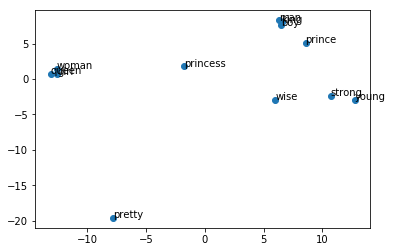

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(w2v_df['x1'], w2v_df['x2'])

for i, txt in enumerate(w2v_df['word']):
    ax.annotate(txt, (w2v_df['x1'][i], w2v_df['x2'][i]))
    
plt.rcParams['figure.figsize'] = (100, 100)